In [42]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:0000:0100:01


In [5]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score

In [6]:
data = pd.read_csv("/Users/yassin/Desktop/MS-Data Analytics/Data Mining II/IBM- Project/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

#reading the data
print = data.head()
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
data['Customer Lifetime Value'].max()

83325.38119

In [8]:
data ['Customer Lifetime Value'].min()

1898.007675

In [9]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
data.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [13]:
data.describe

<bound method NDFrame.describe of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor  

In [14]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [15]:
X = data.drop(['Customer','Effective To Date','Customer Lifetime Value'], axis=1)
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [17]:
# Calculate the variance of each feature
X_train_v1.var(axis=0)

/var/folders/lv/vg5hh86n1nb1xcrxzrn9p7yw0000gn/T/ipykernel_96572/1522271262.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train_v1.var(axis=0)


Income                           9.223826e+08
Monthly Premium Auto             1.178793e+03
Months Since Last Claim          1.009857e+02
Months Since Policy Inception    7.719131e+02
Number of Open Complaints        8.166358e-01
Number of Policies               5.775351e+00
Total Claim Amount               8.522533e+04
dtype: float64

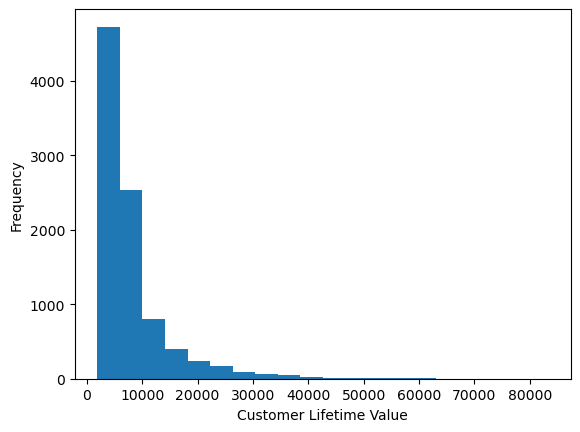

In [18]:
plt.hist(data['Customer Lifetime Value'], bins=20)
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

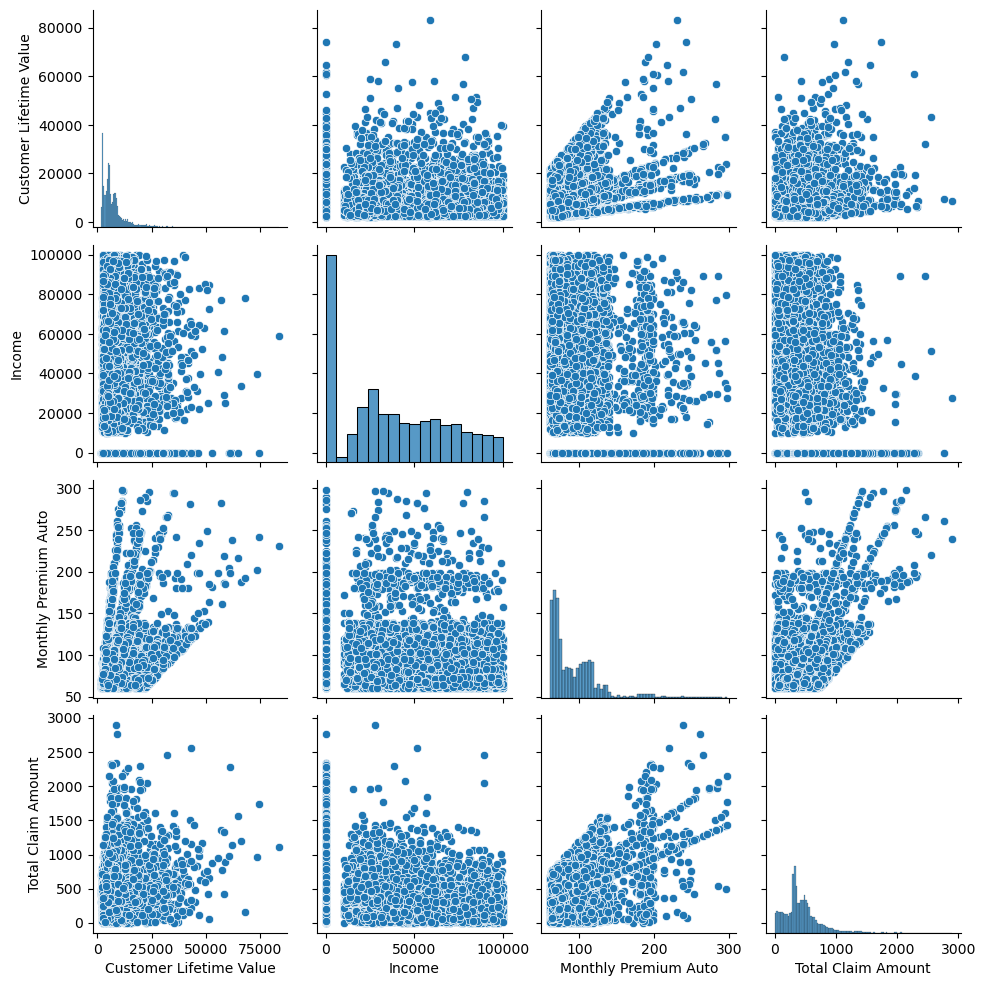

In [19]:
sns.pairplot(data[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']])
plt.show()

In [20]:
label_encoder = LabelEncoder()
categorical_cols = ['Customer', 'State', 'Response', 'Coverage','Education', 'Effective To Date', 'EmploymentStatus','Gender', 'Marital Status', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [21]:
object_cols = data.select_dtypes(include='object').columns
data[object_cols] = data[object_cols].astype('float64')

In [22]:

X = data.drop(['Customer','Effective To Date','Customer Lifetime Value'], axis=1)
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [23]:

# Assuming y_train and X_train are your target and predictor variables, respectively
model = sm.GLM(y_train, X_train, family=sm.families.InverseGaussian(link=sm.families.links.log()))
glm_results = model.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Customer Lifetime Value   No. Observations:                 6850
Model:                                 GLM   Df Residuals:                     6828
Model Family:              InverseGaussian   Df Model:                           21
Link Function:                         log   Scale:                      8.0214e-05
Method:                               IRLS   Log-Likelihood:                -66229.
Date:                     Thu, 20 Jul 2023   Deviance:                      0.37360
Time:                             21:07:18   Pearson chi2:                    0.548
No. Iterations:                         33   Pseudo R-squ. (CS):             0.1363
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.0503      0.070    114.860      0.000       7.913       8.188
State                             0.0081      0.007      1.134      0.257      -0.006       0.022
Response                          0.0068      0.028      0.246      0.806      -0.047       0.061
Coverage                          0.0153      0.018      0.849      0.396      -0.020       0.051
Education                        -0.0002      0.007     -0.034      0.973      -0.013       0.013
EmploymentStatus                 -0.0029      0.010     -0.279      0.781      -0.023       0.017
Gender                           -0.0139      0.019     -0.743      0.457      -0.050       0.023
Income                         3.361e-07   4.57e-07      0.735      0.462    -5.6e-07    1.23e-06
Location Code                     0.0138      0.017      0.837      0.403      -0.019       0.046
Marital Status                   -0.0403      0.016     -2.571      0.010      -0.071      -0.010
Monthly Premium Auto              0.0097      0.001     18.389      0.000       0.009       0.011
Months Since Last Claim           0.0003      0.001      0.364      0.716      -0.001       0.002
Months Since Policy Inception    -0.0006      0.000     -1.813      0.070      -0.001    4.91e-05
Number of Open Complaints        -0.0187      0.010     -1.875      0.061      -0.038       0.001
Number of Policies                0.0140      0.004      3.486      0.000       0.006       0.022
Policy Type                       0.0427      0.041      1.044      0.297      -0.037       0.123
Policy                           -0.0039      0.012     -0.321      0.748      -0.028       0.020
Renew Offer Type                 -0.0383      0.010     -4.010      0.000      -0.057      -0.020
Sales Channel                    -0.0037      0.009     -0.418      0.676      -0.021       0.014
Total Claim Amount            -5.764e-05   5.68e-05     -1.014      0.311      -0.000    5.38e-05
Vehicle Class                     0.0056      0.004      1.250      0.211      -0.003       0.014
Vehicle Size                      0.0206      0.017      1.183      0.237      -0.014       0.055
=================================================================================================
"""

In [24]:
glm_results.summary()


y_pred = glm_results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
'Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred)

('Mean Squared Error (MSE):', 46480682.6551823)

In [25]:
from statsmodels.tools.eval_measures import rmse
r = rmse(y_test, y_pred)
r

6817.674284914343

In [26]:
glm_results.summary()
y_pred = glm_results.predict(X_test)
'Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred)

'R-squared:', r2_score(y_test, y_pred)

('R-squared:', 0.02029761335534097)

# Feature Selection

In [27]:
# Retrain X and Y

X = data.drop(['Customer','Effective To Date','Customer Lifetime Value'], axis=1)
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [28]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [29]:
# Calculate the variance of each feature
X_train_v1.var(axis=0)

State                            1.669995e+00
Response                         1.221985e-01
Coverage                         4.268154e-01
Education                        1.915272e+00
EmploymentStatus                 1.832035e+00
Gender                           2.498967e-01
Income                           9.264769e+08
Location Code                    3.655000e-01
Marital Status                   4.049081e-01
Monthly Premium Auto             1.185974e+03
Months Since Last Claim          1.012429e+02
Months Since Policy Inception    7.772028e+02
Number of Open Complaints        8.045663e-01
Number of Policies               5.757799e+00
Policy Type                      2.282201e-01
Policy                           2.589376e+00
Renew Offer Type                 1.002344e+00
Sales Channel                    1.149270e+00
Total Claim Amount               8.456018e+04
Vehicle Class                    4.293021e+00
Vehicle Size                     2.871223e-01
dtype: float64

In [30]:

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

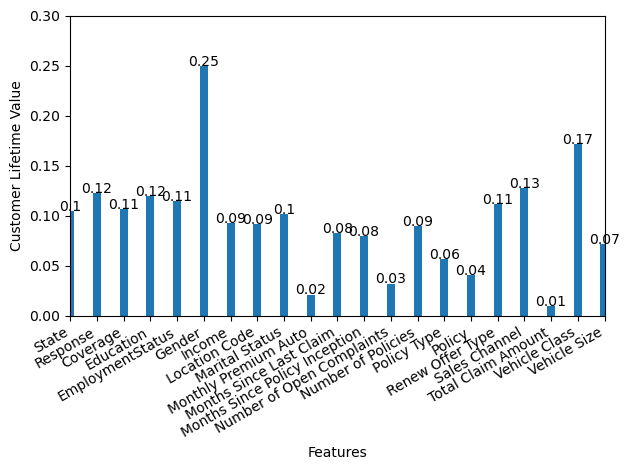

In [31]:
fig, ax = plt.subplots()

x = X.columns
# x = x.sort_values(ascending=True)
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.3)
ax.set_xlabel('Features')
ax.set_ylabel('Customer Lifetime Value')
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 20)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.0001, s=str(round(value, 2)), ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [32]:
X_train_v1 = X_train_v1.drop(['Total Claim Amount', 'Policy', 'Policy Type', 'Number of Open Complaints', 'Monthly Premium Auto'], axis=1)
X_test_v1 = X_test_v1.drop(['Total Claim Amount', 'Policy', 'Policy Type', 'Number of Open Complaints', 'Monthly Premium Auto'], axis=1)


In [33]:
# Model fitting again
X_train = sm.add_constant(X_train_v1)
X_test = sm.add_constant(X_test_v1)

model = sm.GLM(y_train, X_train,family=sm.families.InverseGaussian(link=sm.families.links.log()))
glm_results = model.fit()

glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Customer Lifetime Value   No. Observations:                 6850
Model:                                 GLM   Df Residuals:                     6833
Model Family:              InverseGaussian   Df Model:                           16
Link Function:                         log   Scale:                      9.4495e-05
Method:                               IRLS   Log-Likelihood:                -66804.
Date:                     Thu, 20 Jul 2023   Deviance:                      0.43502
Time:                             21:07:18   Pearson chi2:                    0.646
No. Iterations:                         32   Pseudo R-squ. (CS):            0.04210
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.8369      0.064    139.012      0.000       8.712       8.961
State                             0.0053      0.008      0.652      0.514      -0.011       0.021
Response                         -0.0280      0.031     -0.915      0.360      -0.088       0.032
Coverage                          0.2121      0.017     12.303      0.000       0.178       0.246
Education                         0.0098      0.008      1.298      0.194      -0.005       0.025
EmploymentStatus                 -0.0246      0.012     -2.134      0.033      -0.047      -0.002
Gender                           -0.0017      0.021     -0.079      0.937      -0.043       0.039
Income                         -8.89e-10   5.07e-07     -0.002      0.999   -9.95e-07    9.93e-07
Location Code                     0.0164      0.017      0.951      0.342      -0.017       0.050
Marital Status                   -0.0259      0.017     -1.493      0.136      -0.060       0.008
Months Since Last Claim           0.0001      0.001      0.110      0.912      -0.002       0.002
Months Since Policy Inception    -0.0006      0.000     -1.633      0.102      -0.001       0.000
Number of Policies                0.0099      0.004      2.225      0.026       0.001       0.019
Renew Offer Type                 -0.0529      0.011     -4.942      0.000      -0.074      -0.032
Sales Channel                     0.0026      0.010      0.262      0.793      -0.017       0.022
Vehicle Class                     0.0526      0.005     10.222      0.000       0.043       0.063
Vehicle Size                      0.0287      0.019      1.475      0.140      -0.009       0.067
=================================================================================================
"""

In [34]:
y_pred = glm_results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
rmse

6059.850110723947

# Pre-Processing

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_v1)
X_test_scaled = sc.transform(X_test_v1)



# ***PCA = Inverse Gaussian***

In [36]:
plt.style.use('seaborn-whitegrid')
plt.rc('figure',autolayout=True)
plt.rc('axes',labelweight ='bold', labelsize = 'large',
       titleweight = 'bold',titlesize = 14,titlepad = 10,
)

/var/folders/lv/vg5hh86n1nb1xcrxzrn9p7yw0000gn/T/ipykernel_96572/951430346.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [37]:
def apply_pca(X_train_scaled, standardize=True):
    if standardize:
        X1 = (X_train_scaled - X_train_scaled.mean(axis=0)) / X_train_scaled.std(axis=0)

    # PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_train)

    # Convert DF
    components_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=components_names)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=components_names,
        index=X_train_scaled.columns,
    )

    return pca, X_pca, loadings

In [38]:
def plot_variance(pca,width=8, dpi=100):
  fig, axs = plt.subplots(1,2)
  n = pca.n_components_
  grid = np.arrange(1,n+1)
  evr = pca.explained_variance_ratio_
  axs = [0].bar(grid,evr)
  axs[0].set(
      xlabel_pca = 'Component', title = "Variance", ylim = (0.0,1.0)
  )
# Cummulative Variance
  cv = np.cumsum(evr)
  axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
  axs[1].set(
      xlabel_pca = 'Component', title = "Variance", ylim = (0.0,1.0)
)

# Set up the figure
  fig.set(figwidth=8, dpi=100)
  return axs

In [39]:
def make_mi_scores(X_train, y_train):
  X_train_scaled = X_train.copy()
  for columns in X_train.select_dtypes(['object','category']):
    X_train_scaled['Gender'], _ = X_train_scaled['State'].factorize()

# All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X_train_scaled.dtypes]
    mi_scores = mutual_info_regression(X_train_scaled, y_train, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name="Scores", index=X_train_scaled.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

Model Score

In [43]:
from xgboost import XGBRegressor

def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X_train_scaled['Gender'], _ = X_train_scaled['State'].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [44]:
df = data

In [46]:
df_features_v1 = pd.DataFrame(df[features_v1], columns=features_v1)

# Calculate correlation between df[features_v1] and X_train_scaled
correlations = df_features_v1.corrwith(pd.DataFrame(X_train_scaled, columns=df.columns))

print("Correlation:")
print(correlations)

ValueError: Shape of passed values is (6850, 16), indices imply (6850, 24)

# ***K-Means = Inverse Gaussian***

In [ ]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CLV')
plt.show()

In [ ]:
# Fitting K-Means to the data

kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_train_scaled)

# Cluster number 1 instead of. 0
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans+1

# DF = Cluster
cluster = pd.DataFrame(y_kmeans1)

# Add Cluster to data
data['cluster'] = cluster

# Mean of Clusters
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

#***Hierarchical Clustering = Inverse Gaussian***

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [ ]:
hc_standardized = X_train

# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(hc_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# Inverse Gaussian

In [ ]:
# Retrain X and Y

X = data.drop(['Customer','Effective To Date','Customer Lifetime Value'], axis=1)
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [ ]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
# Calculate the variance of each feature
X_train_v1.var(axis=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

In [ ]:
X_train_v1 = X_train_v1.drop(['Total Claim Amount', 'Policy', 'Policy Type', 'Number of Open Complaints', 'Monthly Premium Auto'], axis=1)
X_test_v1 = X_test_v1.drop(['Total Claim Amount', 'Policy', 'Policy Type', 'Number of Open Complaints', 'Monthly Premium Auto'], axis=1)

In [ ]:
import numpy as np
import statsmodels.api as sm

# Step 1: Check for missing values
missing_values = np.isnan(X_train).any(axis=1)
if np.any(missing_values):
    # Step 2: Handle missing values (remove or impute)
    X_train = X_train[~missing_values]
    y_train = y_train[~missing_values]

# Step 3: Check for infinite values (if necessary, handle them)

# Step 4: Create the GLM model
model = sm.GLM(y_train, X_train, family=sm.families.InverseGaussian(link=sm.families.links.log()))

# Step 5: Fit the model to the data
result = model.fit()
result.summary()

In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
'Root Mean Squared Error (RMSE):', rmse

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the eigenvalues (variances) from your PCA
eigenvalues = [...]  # Replace [...] with your list of eigenvalues

# Calculate the cumulative variance explained by each principal component
total_variance = sum(eigenvalues)
explained_variance_ratio = np.cumsum(eigenvalues) / total_variance

# Create the scree plot
plt.plot(range(1, len(eigenvalues) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()